## *A demo ipynb*

In [ ]:
# library for reading from the internet
import urllib

In [ ]:
huck_finn_url = urllib.request.urlopen("http://www.gutenberg.org/files/76/76-0.txt")
huck_finn_text = huck_finn_url.read()

In [26]:
# Split into a lsit of Chapters
huck_finn_chapters = huck_finn_text.decode().split('CHAPTER ')[44:]

In [27]:
type(huck_finn_chapters)

list

In [28]:
huck_finn_chapters

['I.\r\n\r\n\r\nYou don’t know about me without you have read a book by the name of The\r\nAdventures of Tom Sawyer; but that ain’t no matter. That book was made\r\nby Mr. Mark Twain, and he told the truth, mainly. There was things\r\nwhich he stretched, but mainly he told the truth. That is nothing. I\r\nnever seen anybody but lied one time or another, without it was Aunt\r\nPolly, or the widow, or maybe Mary. Aunt Polly—Tom’s Aunt Polly, she\r\nis—and Mary, and the Widow Douglas is all told about in that book,\r\nwhich is mostly a true book, with some stretchers, as I said before.\r\n\r\nNow the way that the book winds up is this: Tom and me found the money\r\nthat the robbers hid in the cave, and it made us rich. We got six\r\nthousand dollars apiece—all gold. It was an awful sight of money when\r\nit was piled up. Well, Judge Thatcher he took it and put it out at\r\ninterest, and it fetched us a dollar a day apiece all the year\r\nround—more than a body could tell what to do with. 

In [ ]:
!pip install datascience

In [29]:
# table() not recoganised so import from datascience
from datascience import *

In [30]:
Table().with_column('Chapters', huck_finn_chapters).show()

Chapters
I. You don’t know about me without you have read a ...
II. We went tiptoeing along a path amongst the tree ...
"III. Well, I got a good going-over in the morning f ..."
"IV. Well, three or four months run along, and it wa ..."
V. I had shut the door to. Then I turned around and ...
"VI. Well, pretty soon the old man was up and around ..."
VII. “Git up! What you ’bout?” I opened my eyes ...
VIII. The sun was up so high when I waked that I ju ...
IX. I wanted to go and look at a place right about ...
X. After breakfast I wanted to talk about the dead ...


In [31]:
import numpy as np
import pandas as pd

In [32]:
#  Count how many times the names Jim, Tom, and Huck appear in each chapter of Hucklebury Fin
counts = Table().with_columns([
'Jim', np.char.count(huck_finn_chapters, 'Jim'),
'Tom', np.char.count(huck_finn_chapters, 'Tom'),
'Huck', np.char.count(huck_finn_chapters, 'Huck')
])

In [33]:
counts

Jim,Tom,Huck
0,6,3
16,24,2
0,5,2
8,0,1
0,0,0
0,0,2
0,2,0
22,2,5
11,0,1
19,0,0


In [34]:
## Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1,44, 1))

In [35]:
cum_counts

Jim,Tom,Huck,Chapter
0,6,3,1
16,30,5,2
16,35,7,3
24,35,8,4
24,35,8,5
24,35,10,6
24,37,10,7
46,39,15,8
57,39,16,9
76,39,16,10


In [36]:
# Import Visualisation and graph plotting  Libraries
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
#plots.style.use('fivethirtyeight')

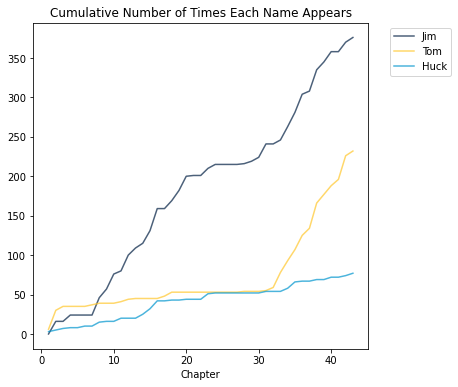

In [37]:
cum_counts.plot(column_for_xticks=3) 
# column 3 is chapter No
plots.title('Cumulative Number of Times Each Name Appears', y=1);

In [41]:
# A similar ex with 'little woman'
women_url = urllib.request.urlopen("http://www.gutenberg.org/cache/epub/514/pg514.txt")
women_text = women_url.read()

In [42]:
women_chapters = women_text.decode().split('CHAPTER ')[48:]

In [43]:
Table().with_column('Chapters', women_chapters).show()

Chapters
ONE PLAYING PILGRIMS “Christmas won’t be Christmas ...
TWO A MERRY CHRISTMAS Jo was the first to wake in ...
THREE THE LAURENCE BOY “Jo! Jo! Where are you?” cr ...
"FOUR BURDENS “Oh, dear, how hard it does seem to t ..."
FIVE BEING NEIGHBORLY “What in the world are you g ...
SIX BETH FINDS THE PALACE BEAUTIFUL The big house ...
SEVEN AMY’S VALLEY OF HUMILIATION “That boy is a p ...
"EIGHT JO MEETS APOLLYON “Girls, where are you goin ..."
NINE MEG GOES TO VANITY FAIR “I do think it was th ...
"TEN THE P.C. AND P.O. As spring came on, a new set ..."


In [44]:
#  Counts of names in the chapters of Little Women
counts = Table().with_columns([
'Amy', np.char.count(women_chapters, 'Amy'),
'Beth', np.char.count(women_chapters, 'Beth'),
'Jo', np.char.count(women_chapters, 'Jo'),
'Meg', np.char.count(women_chapters, 'Meg'),
'Laurie', np.char.count(women_chapters,'Laurie'),])

In [45]:
counts

Amy,Beth,Jo,Meg,Laurie
23,26,44,26,0
13,12,21,20,0
2,2,62,36,16
14,18,34,17,0
6,14,55,13,35
6,28,13,5,9
27,5,9,5,7
48,9,71,16,17
3,5,21,71,24
5,5,12,4,4


In [46]:
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1,48,1))

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/datascience/tables.py:305: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


In [47]:
cum_counts

Amy,Beth,Jo,Meg,Laurie,Chapter
23,26,44,26,0,1
36,38,65,46,0,2
38,40,127,82,16,3
52,58,161,99,16,4
58,72,216,112,51,5
64,100,229,117,60,6
91,105,238,122,67,7
139,114,309,138,84,8
142,119,330,209,108,9
147,124,342,213,112,10


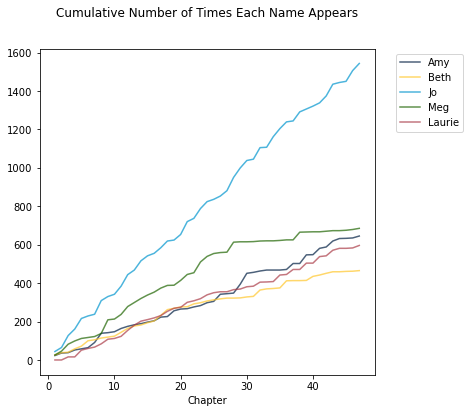

In [48]:
#  Plot the cumulative counts.

cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears',y=1.08);
#y=1.08 specifies the vertical position of heading
#column 5 is x axis i.e., chapter

In [49]:
#  In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.
chars_periods_huck_finn = Table().with_columns(['Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
'Number of Periods', np.char.count(huck_finn_chapters,'.')])
chars_periods_little_women = Table().with_columns(['Little Women Chapter Length', [len(s) for s in women_chapters],
'Number of Periods',np.char.count(women_chapters, '.')])


In [50]:
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7151,66
12260,117
8698,72
6963,84
8362,91
14786,125
13479,127
22733,249
8244,71
7181,70


In [51]:
chars_periods_little_women

Little Women Chapter Length,Number of Periods
22315,189
22675,188
21168,231
26079,195
24076,255
14951,140
14797,131
23039,214
34616,337
19113,185


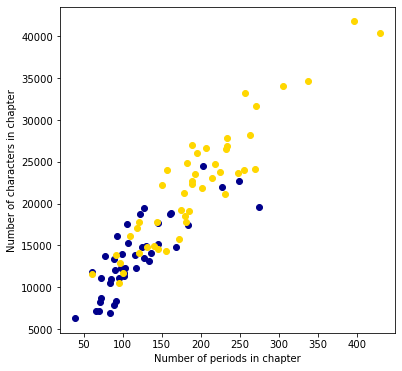

In [52]:
# Compare the chapter lenghts and number of periods in each
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), chars_periods_huck_finn.column(0),color='darkblue')
plots.scatter(chars_periods_little_women.column(1),chars_periods_little_women.column(0),color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

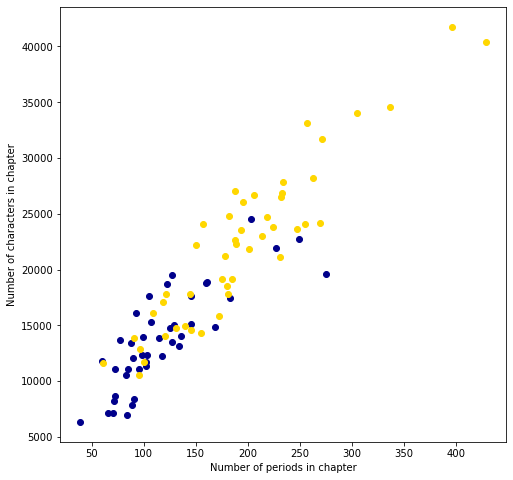

In [53]:
#increasing the plot size
plots.figure(figsize=(8,8))
plots.scatter(chars_periods_huck_finn.column(1), chars_periods_huck_finn.column(0),color='darkblue')
plots.scatter(chars_periods_little_women.column(1),chars_periods_little_women.column(0),color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');